In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv('Dataset/Mobile_Price/train.csv')

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

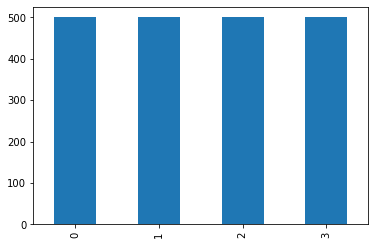

In [7]:
data.price_range.value_counts().plot(kind='bar')

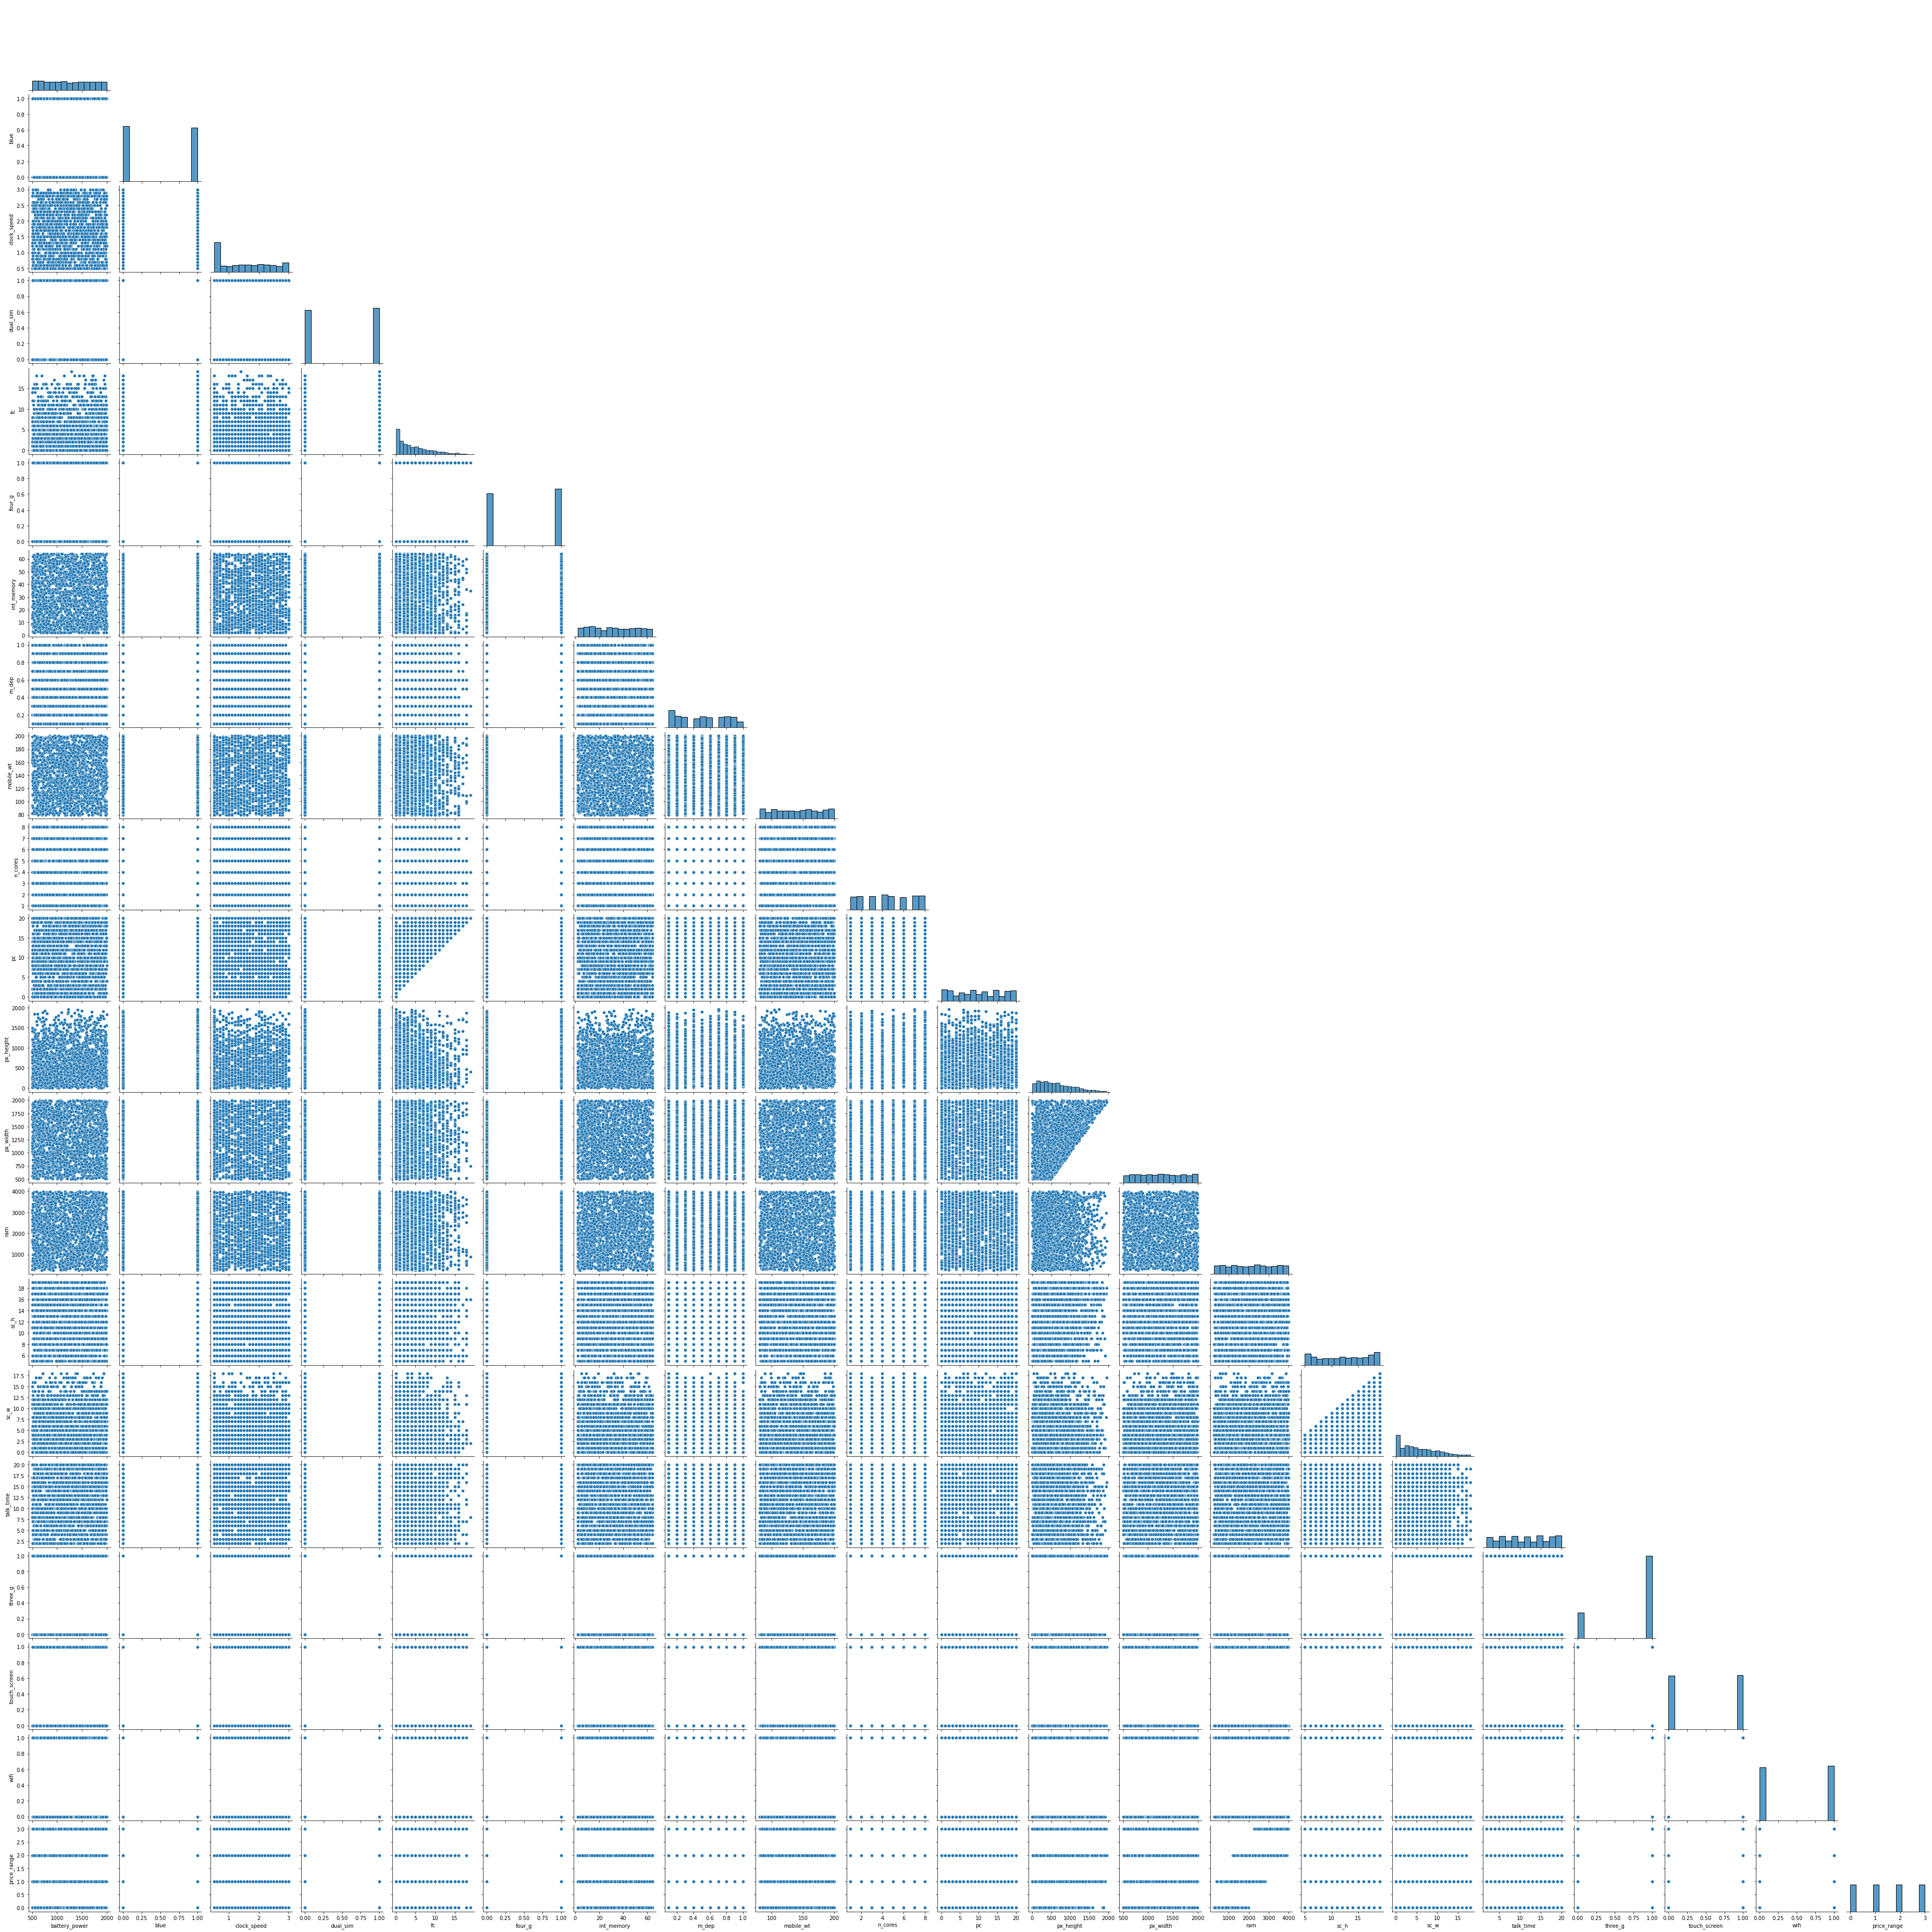

In [8]:
sns.pairplot(data,corner=True)

In [9]:
features=data.drop(columns='price_range')
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_data

,feature,VIF
0,battery_power,8.076717
1,blue,1.981927
2,clock_speed,4.260479
3,dual_sim,2.015006
4,fc,3.413529
5,four_g,3.194321
6,int_memory,3.961239
7,m_dep,3.911115
8,mobile_wt,12.972548
9,n_cores,4.646070


In [10]:
features['sc_diag']=np.sqrt(features['sc_h']**2 + features['sc_w']**2)
new_features=features.drop(columns=['mobile_wt','px_height','px_width','sc_h','sc_w'])
new_vif_data = pd.DataFrame()
new_vif_data["feature"] = new_features.columns
new_vif_data["VIF"] = [variance_inflation_factor(new_features.values, i) for i in range(len(new_features.columns))]
new_vif_data

,feature,VIF
0,battery_power,7.593431
1,blue,1.975690
2,clock_speed,4.120089
3,dual_sim,1.984417
4,fc,3.411077
5,four_g,3.192298
6,int_memory,3.884713
7,m_dep,3.786790
8,n_cores,4.487719
9,pc,6.141687


In [11]:
from scipy import stats

corr_chk=pd.DataFrame()
#H0: Apakah data terdistribusi scr normal?

def corr_norm_test(feature):
    mu=np.mean(feature)
    std=np.mean(feature)
    norm=stats.norm(mu,std)
    _,p=stats.normaltest(norm.pdf(feature))
    
    if p<1e-3:
        r,_=stats.pearsonr(feature,data.price_range.values)
    if p>1e-3:
        r,_=stats.spearmanr(feature,data.price_range)
    return r

corr_chk['features']=new_features.columns
corr_chk['Correlation']=[corr_norm_test(new_features.values[:,i]) for i in range(len(new_features.columns))]
corr_chk

,features,Correlation
0,battery_power,0.200723
1,blue,0.020573
2,clock_speed,-0.006606
3,dual_sim,0.017444
4,fc,0.021998
5,four_g,0.014772
6,int_memory,0.044435
7,m_dep,0.000853
8,n_cores,0.004399
9,pc,0.033599


In [40]:
#H0=mean_corr=0
#H1=mean_corr>|y|
data['sc_diag']=np.sqrt(data['sc_h']**2 + data['sc_w']**2)
corr_ftest=pd.DataFrame()
corr_ftest['features']=new_features.columns
corr_ftest['Correlation']=['Not-Correlated' if stats.f_oneway(*data.groupby(x)['price_range'].apply(list))[1]>0.05 else 'Correlated' for x in new_features.columns]
corr_ftest

,features,Correlation
0,battery_power,Correlated
1,blue,Not-Correlated
2,clock_speed,Not-Correlated
3,dual_sim,Not-Correlated
4,fc,Not-Correlated
5,four_g,Not-Correlated
6,int_memory,Correlated
7,m_dep,Not-Correlated
8,n_cores,Not-Correlated
9,pc,Not-Correlated


## Scenario 1

In [70]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score

In [14]:
scaler=StandardScaler()
X=scaler.fit_transform(new_features)
X_train,X_test,y_train,y_test=train_test_split(X,data.price_range,test_size=0.3,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [34]:
kf=KFold(n_splits=5)

In [61]:
cv_idx=[[],[]]
for train_indices, test_indices in kf.split(X):
    cv_idx[0].append(train_indices)
    cv_idx[1].append(test_indices)

In [80]:
model=SVC(kernel='rbf',probability=True)
acc=[]
y=data.price_range
for i in range(5):
    tr_id=cv_idx[0][i]
    ts_id=cv_idx[1][i]
    model.fit(X[tr_id],y[tr_id])
    y_pred=model.predict(X[ts_id])
    acc.append(accuracy_score(y[ts_id],y_pred))

In [81]:
for i in range(len(acc)):
    if acc[i]==max(acc):
        break

tr_id=cv_idx[0][i]
ts_id=cv_idx[1][i]
model.fit(X[tr_id],y[tr_id])
y_pred=model.predict(X[ts_id])
accuracy_score(y[ts_id],y_pred)

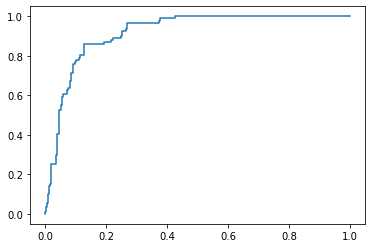

In [94]:
fpr=roc_curve(y[ts_id],model.predict_proba(X[ts_id])[:,1],pos_label=1)[0]
tpr=roc_curve(y[ts_id],model.predict_proba(X[ts_id])[:,1],pos_label=1)[1]
pl.plot(fpr,tpr)

In [58]:
cross_val_score(SVC(kernel='poly'),X,data.price_range,cv=5,scoring='accuracy')

array([0.7125, 0.695 , 0.7175, 0.685 , 0.7125])

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.80933333 0.80933333]
  warnings.warn(


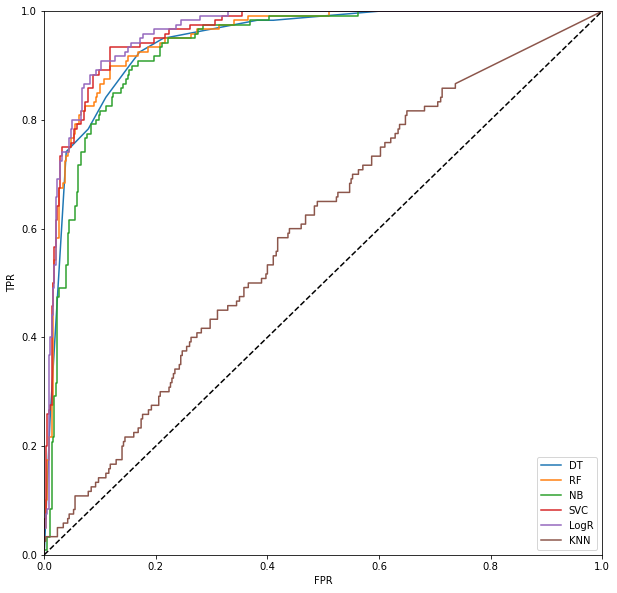

In [96]:
params=[
    {'max_depth':[4,5,6]},
    {'n_estimators':[50,100,150],'max_depth':[4,5,6]},
    {'C':[0.1,0.5,1,1.5],'kernel':['rbf','sigmoid','linear']},
    {'penalty':['l1','l2'],'solver':['newton-cg','lbfgs']},
    {'weights':['uniform','distance'],'metric':['euclidean','minkowski']}
]

grid=[
    GridSearchCV(DecisionTreeClassifier(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[1],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(SVC(),params[2],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(LogisticRegression(),params[3],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(KNeighborsClassifier(),params[4],scoring='accuracy',cv=5,n_jobs=10),
]

for g in grid:
    g.fit(X_train,y_train)

models=[
    DecisionTreeClassifier(max_depth=grid[0].best_params_['max_depth']),
    RandomForestClassifier(n_estimators=grid[1].best_params_['n_estimators'],max_depth=grid[1].best_params_['max_depth']),
    GaussianNB(),
    SVC(C=grid[2].best_params_['C'],kernel=grid[2].best_params_['kernel'],probability=True),
    LogisticRegression(penalty=grid[3].best_params_['penalty'],solver=grid[3].best_params_['solver'],fit_intercept=True),
    KNeighborsClassifier(weights=grid[4].best_params_['weights'],metric=grid[4].best_params_['metric'])
]

for mod in models:
    mod.fit(X_train,y_train)

y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['DT','RF','NB','SVC','LogR','KNN']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(data.price_range.unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=pl.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [59]:
class_report.transpose()

,precision,recall,f1,support
DT_0,0.902985,0.960317,0.930769,126.0
DT_1,0.855769,0.741667,0.794643,120.0
DT_2,0.661765,0.782609,0.717131,115.0
DT_3,0.880952,0.798561,0.837736,139.0
RF_0,0.916667,0.960317,0.937984,126.0
RF_1,0.779528,0.825000,0.801619,120.0
RF_2,0.697248,0.660870,0.678571,115.0
RF_3,0.878788,0.834532,0.856089,139.0
NB_0,0.899225,0.920635,0.909804,126.0
NB_1,0.750000,0.775000,0.762295,120.0


## Scenario 2

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(new_features[['battery_power','int_memory','ram','sc_diag']])
X_train,X_test,y_train,y_test=train_test_split(X,data.price_range)

In [ ]:
models=[
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100,random_state=0),
    GaussianNB(),
    SVC(probability=True),
    LogisticRegression(fit_intercept=True),
    KNeighborsClassifier(weights='distance',metric='euclidean')
]
for mod in models:
    mod.fit(X_train,y_train)

y_pred2=[mod.predict(X_test) for mod in models]
scores2=[mod.predict_proba(X_test)[:,1] for mod in models]
curve2=[[roc_curve(y_test,score,pos_label=0)[0],roc_curve(y_test,score,pos_label=0)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report2=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['DT','RF','NB','SVC','LogR','KNN']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(data.price_range.unique())):
        class_report2['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=pl.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [ ]:
class_report2.transpose()